# Chapter 4: Building Good Training Sets - Data Preprocessing

## Missing data

In [1]:
%matplotlib inline
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
print(df.values)
print(type(df.values))

[[  1.   2.   3.   4.]
 [  5.   6.  nan   8.]
 [  0.  11.  12.  nan]]
<class 'numpy.ndarray'>


In [6]:
df.dropna()

,A,B,C,D
0,1,2,3,4


In [7]:
df.dropna(axis=1)

,A,B
0,1,2
1,5,6
2,0,11


In [5]:
print(df.dropna(how='all'))
print(df.dropna(thresh=4))
print(df.dropna(subset=['C']))

     A     B     C    D
0  1.0   2.0   3.0  4.0
1  5.0   6.0   NaN  8.0
2  0.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0
     A     B     C    D
0  1.0   2.0   3.0  4.0
2  0.0  11.0  12.0  NaN


different interpolation methods  
transformer: fit and transform  
estimator: fit and predict

In [6]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

## Categorical Data  
***ordinal*** and ***nominal***

In [11]:
df = pd.DataFrame([
        ['green', 'M', 10.1, 'class1'],
        ['red', 'L', 13.5, 'class2'],
        ['blue', 'XL', 15.3, 'class1']
    ])
df.columns=['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [12]:
# manually map the ordinal features
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [13]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


## One-hot encoding on nominal features  
***dummy variables***

In [16]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [17]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()



array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [19]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


## Partioning a dataset in training and test sets

In [20]:
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-'
                      'learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium', 'Total phenols',
                  'Flavanoids', 'Nonflavanoid penols', 'Proanthocyanins',
                  'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                  'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()


Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid penols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Feature scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)


In [23]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


## Feature selection  
### penalty

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))


Training accuracy:  0.983870967742
Test accuracy:  0.981481481481


In [27]:
# One-vs-Rest: three dimension coefficients
print(lr.coef_)
print(lr.intercept_)


[[ 0.28042898  0.          0.         -0.02790222  0.          0.
   0.71021667  0.          0.          0.          0.          0.
   1.23615052]
 [-0.64378526 -0.06892564 -0.05716812  0.          0.          0.          0.
   0.          0.         -0.92714082  0.05987692  0.         -0.37100603]
 [ 0.          0.06134311  0.          0.          0.          0.
  -0.63709587  0.          0.          0.49859917 -0.35796727 -0.57039689
   0.        ]]
[-0.38382338 -0.15812328 -0.70037427]


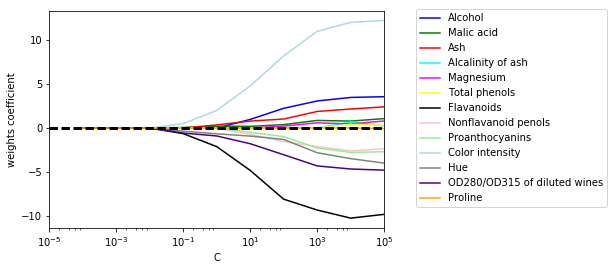

In [28]:
import matplotlib.pyplot as plt
fir = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
         'magenta','yellow', 'black',
         'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in range(-4,6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[2])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weights coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

### sequential feature selection

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from SequentialBackwardSelection import SBS

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

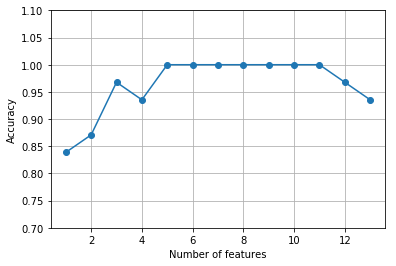

In [30]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [31]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [32]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

Training accuracy:  0.983870967742
Test accuracy:  0.944444444444


In [33]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy: ', knn.score(X_test_std[:, k5], y_test))

Training accuracy:  0.959677419355
Test accuracy:  0.962962962963


## Assess feature importance with random forests  
***averaged impurity decrease***

In [34]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid penols            0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


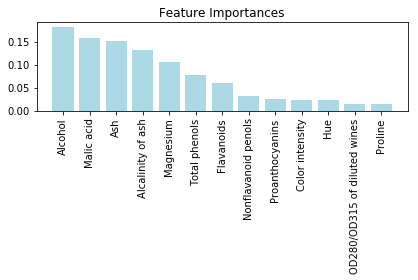

In [35]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [49]:
from sklearn.feature_selection import SelectFromModel
X_selected = SelectFromModel(forest, threshold=0.15, prefit=True).transform(X_train)
print(X_selected.shape)

(124, 3)


## Summary  
1. handle missing data
2. handle categorical feature (nominal and ordinal)
3. prevent overfitting: L1 regularization; sequential feature selection algorithm

[feature selection](http://scikit-learn.org/stable/modules/feature_selection.html)  
1. remove features with low variance
2. univariate feature selection (filter?)
3. recursive feature elimination
4. L1-based feature selection
5. Randomized sparse models
6. Tree-based feature selection